<a href="https://colab.research.google.com/github/ashwinigit123/CSE6324Team5/blob/main/Iteration3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
#Reading the CSVs: Github and Matlab
import pandas as pd
matUrl = 'https://raw.githubusercontent.com/ashwinigit123/CSE6324Team5/main/MATC_Projects.csv'
gitUrl = 'https://raw.githubusercontent.com/ashwinigit123/CSE6324Team5/main/GitHub_Projects.csv'


matdf = pd.read_csv(matUrl)
gitdf = pd.read_csv(gitUrl)

In [336]:
matdf.head()

,id,title,author_name,mathworks_url,summary,content,category,author_uri,published,updated,no_of_comments,no_of_ratings,average_rating,downloads,download_link,license,model_files,num_model_file
0,261,RF Design and Analysis,Jackson Harvey,https://www.mathworks.com/matlabcentral/fileex...,"A collection of functions, scripts, & Simulink...",<p>This is a collection of MATLAB functions an...,NaN,https://www.mathworks.com/matlabcentral/profil...,2001-07-23 12:51:25.000000,2001-07-23 12:51:25.000000,18,46,4,3,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, Jackson Harvey\nAll rights...","RF.mdl,",1
1,266,smxl,Giampiero Campa,https://www.mathworks.com/matlabcentral/fileex...,The Simulink MatriX Library (SMXL) - a collect...,<p>SMXL (Simulink MatriX Library) it's a power...,NaN,https://www.mathworks.com/matlabcentral/profil...,2007-10-23 08:01:38.000000,2007-10-23 08:01:38.000000,3,4,4,1,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 1999, Giampiero Campa\nAll right...","smxl.mdl,examples/vrsvdex.mdl,examples/vrranke...",15
2,268,trimmod,Joerg Buchholz,https://www.mathworks.com/matlabcentral/fileex...,TrimMod finds the trim point (equilibrium) of ...,<p>TrimMod finds the trim point (equilibrium) ...,NaN,https://www.mathworks.com/matlabcentral/profil...,2017-03-17 11:54:23.000000,2017-03-17 11:54:23.000000,1,2,5,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2009, Joerg Buchholz\nAll rights...",trimmod/trimtest/trimtest_with_vector_outport....,2
3,722,Bluetooth modulation and frequency hopping,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:04.000000,2016-09-01 15:00:04.000000,21,22,4,12,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","bluetooth.mdl,R12.1 Original Version/bluetooth...",2
4,724,DTMF generator and receiver,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:05.000000,2016-09-01 15:00:05.000000,11,27,3,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","dtmf.mdl,R12.1 Original Version/dtmf.mdl,",2


In [337]:
gitdf.head()

,id,repo_name,owner_name,is_private,project_url,Description,is_forked,api_url,created_at,updated_at,pushed_at,homepage_url,size_in_kb,stargazers_count,watchers_count,language,forks_count,open_issues_count,master_branch,default_branch,Topics,license,model_files,num_model_file,version_sha
0,789683,ECAN_dspic,Susurrus,0,https://github.com/Susurrus/ECAN_dspic,An ECAN library for the dsPIC33f in both C and...,0,https://api.github.com/repos/Susurrus/ECAN_dspic,2010-07-21 21:39:55.000000,2017-04-14 04:08:40.000000,2012-11-05 20:00:53.000000,NaN,NaN,0,0,C,7,1,NaN,master,NaN,"BSD 2-Clause ""Simplified"" License","ECAN_dspic-master/ecan_dspic.mdl,ECAN_dspic-ma...",3,0051e8902eaf3ba07811c8c1753120d894772937
1,919495,truetime,sfischme,0,https://github.com/sfischme/truetime,TrueTime is a Matlab/Simulink-based simulator ...,0,https://api.github.com/repos/sfischme/truetime,2010-09-17 21:41:34.000000,2019-02-27 09:29:27.000000,2011-01-05 04:39:50.000000,http://www.control.lth.se/truetime/,NaN,4,4,C++,18,1,NaN,master,NaN,GNU General Public License v3.0,"truetime-master/kernel/ttNCM_Wrapper.mdl,truet...",22,d1a288960def71acdf2e8a21ae47aa6d69336fab
2,4608325,launchpad_ert,kyak,0,https://github.com/kyak/launchpad_ert,Simulink (Embedded Coder) Target for TI LaunchPad,0,https://api.github.com/repos/kyak/launchpad_ert,2012-06-09 15:47:56.000000,2019-10-15 12:09:18.000000,2014-05-20 09:25:11.000000,NaN,NaN,7,7,Matlab,5,0,NaN,master,NaN,Other,launchpad_ert-master/demos/tilp_pil_system.mdl...,11,4b004e42d8736ca807530ae3f3132196477a5181
3,4790726,osx-sl-joystick,zprime,0,https://github.com/zprime/osx-sl-joystick,Access Joysticks in Simulink on OSX,0,https://api.github.com/repos/zprime/osx-sl-joy...,2012-06-26 04:02:54.000000,2013-12-23 08:33:48.000000,2012-07-19 10:23:38.000000,NaN,NaN,1,1,C++,0,0,NaN,master,NaN,Other,"osx-sl-joystick-master/bin/osx_joystick.mdl,",1,35b428b88f1a1a759fe9bcbe4511da9577f42dab
4,5480060,simulink-rtl-sdr,kit-cel,0,https://github.com/kit-cel/simulink-rtl-sdr,An Open Source Software Package that enables o...,0,https://api.github.com/repos/kit-cel/simulink-...,2012-08-20 10:54:52.000000,2019-04-01 13:00:02.000000,2014-01-22 07:57:36.000000,http://www.cel.kit.edu/simulink_rtl_sdr.php,NaN,27,27,C++,17,1,NaN,master,NaN,GNU General Public License v3.0,simulink-rtl-sdr-master/demo/rtlsdr_spectrum_s...,2,3fefdd32f0f57a1c6de3d00ad999941593447bae


In [338]:
#data cleaning for matlab projects and github projects
matdf['category'].isnull().sum()

88

In [339]:
matdf = matdf.dropna()

In [340]:
gitdf['Description'].isnull().sum()

0

In [341]:
# removing everything except alphabets`
matdf['cat'] = matdf['category'].str.replace("[^a-zA-Z#]", " ")
gitdf['Description'] = gitdf['Description'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [342]:
# removing null fields
matdf = matdf[matdf['cat'].notnull()]
gitdf = gitdf[gitdf['Description'].notnull()]

In [343]:
# removing short words
matdf['cat'] = matdf['cat'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
gitdf['Description'] = gitdf['Description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
matdf['cat'] = matdf['cat'].apply(lambda x: x.lower())
gitdf['Description'] = gitdf['Description'].apply(lambda x: x.lower())

In [344]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["simulink", "Simulink","conversion","simulation","control", "bytes","demo","abhishek","indraanil","saki","system","library","step","series","response","circuit",
                 "client","bonsai","real","matlab","code","used","parrot","using"

]
stop_words.extend(new_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [345]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer1 = TfidfVectorizer(stop_words=stop_words)
vectorizer1.fit(matdf['cat'])
tokenize_text_mat = vectorizer1.transform(matdf['cat'])
print(tokenize_text_mat.shape)

(2636, 2703)


In [346]:
vectorizer2 = TfidfVectorizer(stop_words=stop_words)
vectorizer2.fit(gitdf['Description'])
tokenize_text_git = vectorizer2.transform(gitdf['Description'])
print(tokenize_text_git.shape)

(225, 854)


In [347]:
#finding k using elbow method
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

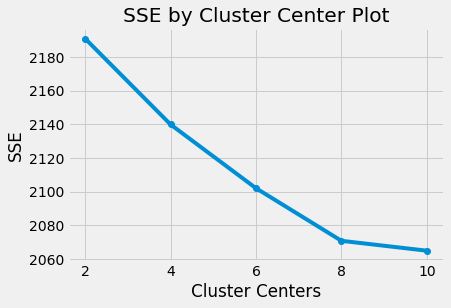

In [348]:
find_optimal_clusters(tokenize_text_mat, 10)

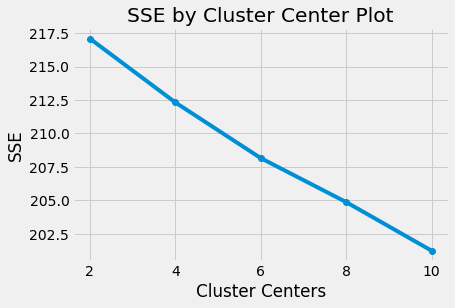

In [349]:
find_optimal_clusters(tokenize_text_git, 10)

In [350]:
#applying kmeans
from sklearn.cluster import KMeans
import numpy as np
num_clusters = 8
matmodel = KMeans(n_clusters=num_clusters)
matmodel.fit(tokenize_text_mat)
#clusters = km.labels_.tolist()
matclusters = matmodel.predict(tokenize_text_mat)
matlabels = np.unique(matclusters)
print(np.unique(matclusters))
print(matmodel.cluster_centers_)
print(matclusters.shape)

[0 1 2 3 4 5 6 7]
[[8.54842871e-04 9.44217734e-05 9.78647404e-04 ... 3.70307403e-04
  0.00000000e+00 4.61215239e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.00762257e-02 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.72801849e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.86359329e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(2636,)


In [351]:
num_clusters = 6
gitModel = KMeans(n_clusters=num_clusters)
gitModel.fit(tokenize_text_git)
#clusters = km.labels_.tolist()
gitclusters = gitModel.predict(tokenize_text_git)
gitlabels = np.unique(gitclusters)
print(np.unique(gitclusters))
print(gitModel.cluster_centers_)

print(gitclusters.shape)

[0 1 2 3 4 5]
[[0.         0.         0.         ... 0.         0.003372   0.00375625]
 [0.0045319  0.         0.         ... 0.         0.         0.01546939]
 [0.         0.01962559 0.         ... 0.01226898 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01697841 ... 0.         0.         0.        ]]
(225,)


In [352]:
#printing the clusters
def printClusters(model,vectorizer,num_clusters):
  print("Top terms per cluster:")
  order_centroids = model.cluster_centers_.argsort()[:, ::-1]
  print("centroids:",order_centroids)
  terms = vectorizer.get_feature_names()
  for i in range(num_clusters):
      print("Cluster %d:" % i),
      for ind in order_centroids[i, :10]:
          print(' %s' % terms[ind]),
      print

In [353]:
printClusters(matmodel,vectorizer1,8)

Top terms per cluster:
centroids: [[1772 1439  471 ... 2236  902  762]
 [1772  731  471 ... 1775 1774    0]
 [1168 1772 1495 ... 1767 1766    0]
 ...
 [1802 2149 1367 ... 1791 1790    0]
 [1772 1469  721 ... 1746 1745 1351]
 [ 677 1772 1469 ... 1784 1783    0]]
Cluster 0:
 power
 modeling
 converter
 electronics
 arduino
 model
 design
 automotive
 fuzzy
 mathematics
Cluster 1:
 power
 electronics
 converter
 design
 management
 battery
 rectifier
 buck
 boost
 mppt
Cluster 2:
 inverter
 power
 multilevel
 spwm
 electronics
 phase
 converter
 clamped
 diode
 level
Cluster 3:
 current
 hysteresis
 inverter
 band
 controller
 power
 inrush
 phase
 hysterisis
 active
Cluster 4:
 design
 biotech
 aerospace
 automotive
 optimization
 power
 modeling
 selftunig
 electronics
 measurement
Cluster 5:
 processing
 signal
 mathematics
 biotech
 design
 communications
 filter
 audio
 optimization
 statistics
Cluster 6:
 power
 motor
 electric
 electronics
 induction
 speed
 modeling
 inverter
 des

In [354]:
printClusters(gitModel,vectorizer2,6)

Top terms per cluster:
centroids: [[759 743 745 ... 367 369   0]
 [637 579  59 ... 494 493 388]
 [480 149 596 ... 544 543   0]
 [677 493 355 ... 563 562   0]
 [471 351  49 ... 551 550   0]
 [628 135 796 ... 549 548   0]]
Cluster 0:
 time
 systems
 target
 design
 example
 framework
 examples
 modeling
 integration
 controller
Cluster 1:
 robot
 project
 based
 source
 open
 model
 interface
 controller
 software
 scara
Cluster 2:
 models
 course
 python
 crps
 programs
 linear
 electric
 power
 tool
 dlls
Cluster 3:
 simscape
 multibody
 import
 hyperloop
 full
 files
 physics
 design
 nieur
 pour
Cluster 4:
 model
 implementation
 automatically
 deploy
 drone
 simple
 dynamics
 generation
 coder
 pass
Cluster 5:
 repository
 contains
 tutorial
 modified
 dual
 files
 patterns
 devices
 robot
 calibration


In [355]:
#Reading the CSVs: Github and Matlab
import pandas as pd
matUrlFornum = 'https://raw.githubusercontent.com/ashwinigit123/CSE6324Team5/main/MATC_Subsys_Info.csv'
matdfSubsys = pd.read_csv(matUrlFornum)
matdfSubsys.head()

,S_ID,File_id,Model_Name,file_path,Depth,Subsystem,Block_count
0,1,10335,gpsnoise.mdl,workdirtmp\gpsnoise.mdl,1,gpsnoise/MultibandNoise,13
1,2,10335,gpsnoise.mdl,workdirtmp\gpsnoise.mdl,2,gpsnoise/MultibandNoise/IIR2,3
2,3,10439,EngineControl.mdl,workdirtmp\mpc555_mtrctrl\demos\EngineControl.mdl,1,EngineControl/Copying PSP output to LED,2
3,4,10439,EngineControl.mdl,workdirtmp\mpc555_mtrctrl\demos\EngineControl.mdl,1,EngineControl/Crankshaft Simulation (MPIO14),2
4,5,10439,EngineControl.mdl,workdirtmp\mpc555_mtrctrl\demos\EngineControl.mdl,1,EngineControl/Flywheel Simulation (MPIO12),2


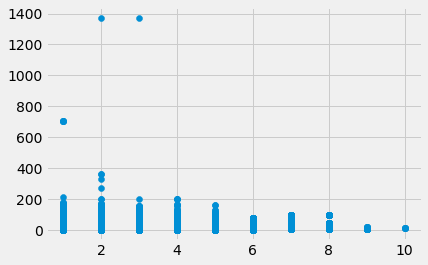

In [356]:
import matplotlib.pyplot as plt
plt.scatter(matdfSubsys['Depth'],matdfSubsys['Block_count'])
plt.show()

In [357]:
X= matdfSubsys.iloc[:, [4,6]].values
print(X)

[[ 1 13]
 [ 2  3]
 [ 1  2]
 ...
 [ 3 20]
 [ 3  6]
 [ 1  5]]


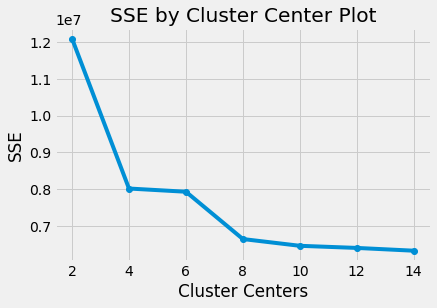

In [358]:
find_optimal_clusters(X, 15)

In [359]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [360]:
kmeans = KMeans(8)
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [361]:
identified_clusters = kmeans.fit_predict(scaled_features)
identified_clusters
print(np.unique(identified_clusters))


[0 1 2 3 4 5 6 7]


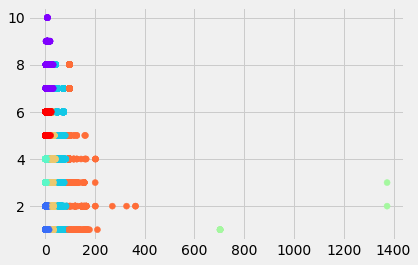

In [362]:
data_with_clusters = matdfSubsys.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Block_count'],data_with_clusters['Depth'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [363]:
#Reading the CSVs: Github and Matlab
import pandas as pd
url2 = 'https://raw.githubusercontent.com/ashwinigit123/CSE6324Team5/main/GitHub_Subsys_Info.csv'
df2 = pd.read_csv(url2)
df2.head()

,S_ID,File_id,Model_Name,file_path,Depth,Subsystem,Block_count
0,1,100042416,BlankCntrlr_model.mdl,workdirtmp\DISCON_Simulink-master\Simulink_32b...,1,BlankCntrlr_model/BlankCntrlr,31
1,2,100042416,DISCON_NREL5MW.slx,workdirtmp\DISCON_Simulink-master\Simulink_64b...,1,DISCON_NREL5MW/Fore-Aft Tower Control,5
2,3,100042416,DISCON_NREL5MW.slx,workdirtmp\DISCON_Simulink-master\Simulink_64b...,1,DISCON_NREL5MW/Pitch Control,23
3,4,100042416,DISCON_NREL5MW.slx,workdirtmp\DISCON_Simulink-master\Simulink_64b...,1,DISCON_NREL5MW/Rate Saturation Pitch,8
4,5,100042416,DISCON_NREL5MW.slx,workdirtmp\DISCON_Simulink-master\Simulink_64b...,1,DISCON_NREL5MW/Rate Saturation Torque,8


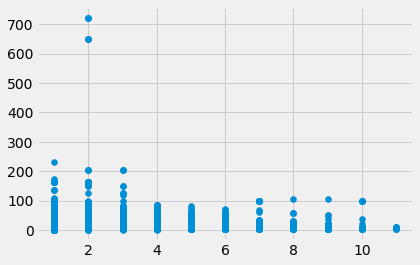

In [364]:
import matplotlib.pyplot as plt
plt.scatter(df2['Depth'],df2['Block_count'])
plt.show()

In [365]:
X2= df2.iloc[:, [4,6]].values
print(X2)

[[ 1 31]
 [ 1  5]
 [ 1 23]
 ...
 [ 2  4]
 [ 2 12]
 [ 3 12]]


In [366]:
scaler = StandardScaler()
scaled_features2 = scaler.fit_transform(X2)

In [367]:
 kmeans = KMeans(  init="random", n_clusters=4,  n_init=10,max_iter=300,random_state=42 )

In [368]:
#kmeans = KMeans(3)
kmeans.fit(X2)
identified_clusters = kmeans.fit_predict(X2)
identified_clusters
print(np.unique(identified_clusters))

[0 1 2 3]


In [369]:
kmeans.inertia_

803826.2986555232

In [370]:
kmeans.cluster_centers_

array([[  2.37588652,  87.45744681],
       [  2.        , 687.        ],
       [  2.88153071,  19.28987168],
       [  3.19735136,   6.3992764 ]])

In [371]:
kmeans.n_iter_

23

In [372]:
kmeans_kwargs = {
	"init": "random",
	"n_init": 10,
	"max_iter": 300,
	"random_state": 42,
}
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
	kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
	kmeans.fit(X2)
	sse.append(kmeans.inertia_)

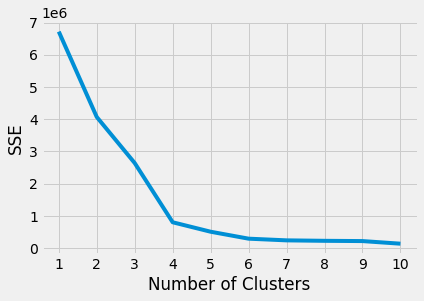

In [373]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

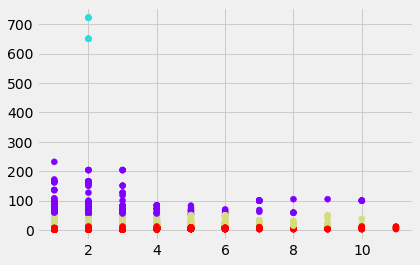

In [374]:
data_with_clusters = df2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Depth'],data_with_clusters['Block_count'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()